In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [41]:
excel_file_path = "C:/Users/Dell/Desktop/CT1.xlsx"

# Read the Excel file
df = pd.read_excel(excel_file_path)

In [42]:
df

,Neighborhood group,Neighbourhood,Latitude,Logitude
0,Manhattan,Upper West Side,40.80178,-73.96723
1,Manhattan,Chinatown,40.71344,-73.99037
2,Manhattan,Upper West Side,40.80316,-73.96545
3,Manhattan,Upper West Side,40.79826,-73.96113
4,Manhattan,Chelsea,40.74192,-73.99501
5,Manhattan,Upper West Side,40.79009,-73.97927
6,Manhattan,Upper West Side,40.78635,-73.97008
7,Manhattan,Chelsea,40.74623,-73.99530
8,Manhattan,Upper East Side,40.77065,-73.95269
9,Manhattan,Upper East Side,40.76865,-73.95058


<Axes: xlabel='Latitude', ylabel='Logitude'>

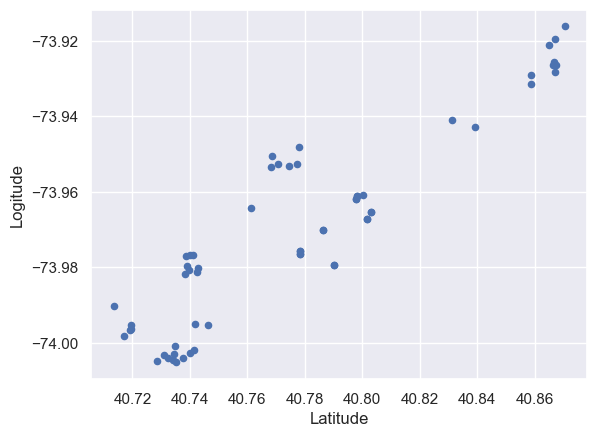

In [43]:
df.plot(kind="scatter",x='Latitude',y='Logitude')

In [44]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Latitude', 'Logitude']])
    sse.append(km.inertia_)

In [45]:
sse

[0.1707829862366656,
 0.05655801588125907,
 0.013016892494696512,
 0.010148031181254426,
 0.006796453110733511,
 0.004847743918814261,
 0.0030451132518208054,
 0.0016439067080954086,
 0.0013955372200000161]

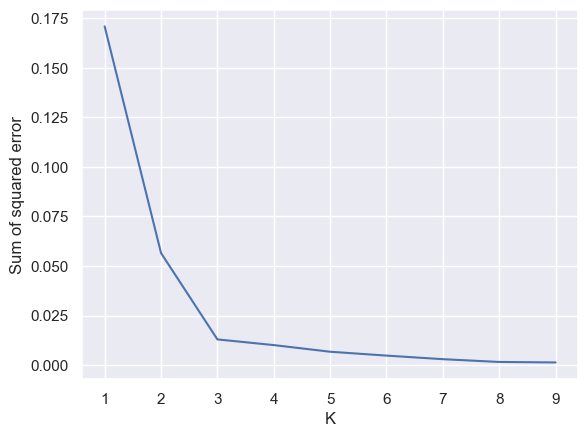

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [47]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [48]:
y_predicted=km.fit_predict(df[['Latitude', 'Logitude']])

In [49]:
y_predicted

array([0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0])

In [50]:
df['cluster']=y_predicted

In [51]:
df

,Neighborhood group,Neighbourhood,Latitude,Logitude,cluster
0,Manhattan,Upper West Side,40.80178,-73.96723,0
1,Manhattan,Chinatown,40.71344,-73.99037,2
2,Manhattan,Upper West Side,40.80316,-73.96545,0
3,Manhattan,Upper West Side,40.79826,-73.96113,0
4,Manhattan,Chelsea,40.74192,-73.99501,2
5,Manhattan,Upper West Side,40.79009,-73.97927,0
6,Manhattan,Upper West Side,40.78635,-73.97008,0
7,Manhattan,Chelsea,40.74623,-73.99530,2
8,Manhattan,Upper East Side,40.77065,-73.95269,0
9,Manhattan,Upper East Side,40.76865,-73.95058,0


In [52]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


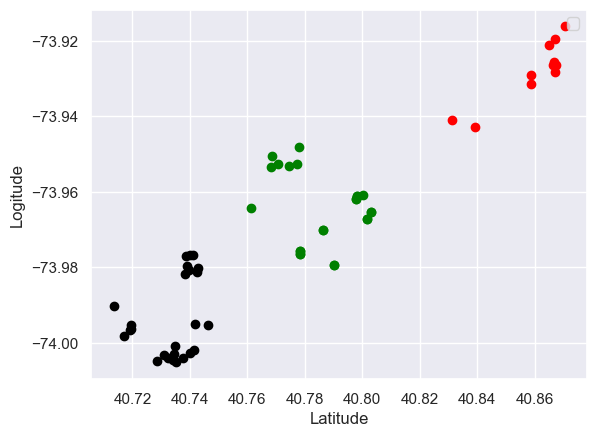

In [53]:
plt.scatter(df1.Latitude,df1['Logitude'],color="green")
plt.scatter(df2.Latitude,df2['Logitude'],color="red")
plt.scatter(df3.Latitude,df3['Logitude'],color="black")

plt.xlabel("Latitude")
plt.ylabel("Logitude")
plt.legend()

In [54]:
scaler=MinMaxScaler() #min max scaler will try to make the scale 0 to 1 on x and y axis
scaler.fit(df[['Logitude']])
df['Logitude'] = scaler.transform(df[['Logitude']])

In [55]:
df

,Neighborhood group,Neighbourhood,Latitude,Logitude,cluster
0,Manhattan,Upper West Side,40.80178,0.426520,0
1,Manhattan,Chinatown,40.71344,0.166928,2
2,Manhattan,Upper West Side,40.80316,0.446489,0
3,Manhattan,Upper West Side,40.79826,0.494952,0
4,Manhattan,Chelsea,40.74192,0.114875,2
5,Manhattan,Upper West Side,40.79009,0.291452,0
6,Manhattan,Upper West Side,40.78635,0.394548,0
7,Manhattan,Chelsea,40.74623,0.111622,2
8,Manhattan,Upper East Side,40.77065,0.589634,0
9,Manhattan,Upper East Side,40.76865,0.613305,0


In [56]:
scaler.fit(df[['Latitude']])
df['Latitude'] = scaler.transform(df[['Latitude']])

In [57]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Latitude','Logitude']])
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1,
       0, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0])

In [58]:
df['cluster']=y_predicted

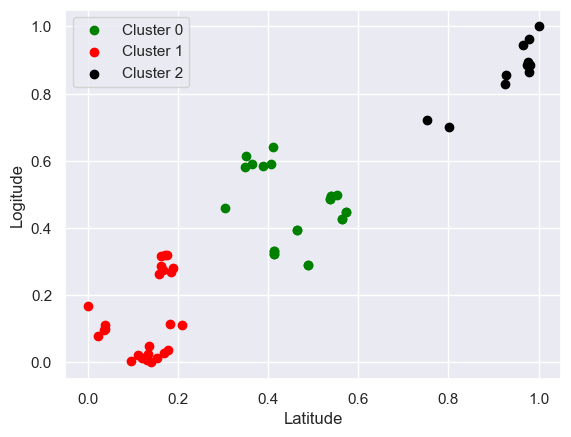

In [59]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Latitude, df1['Logitude'], color="green", label='Cluster 0')
plt.scatter(df2.Latitude, df2['Logitude'], color="red", label='Cluster 1')
plt.scatter(df3.Latitude, df3['Logitude'], color="black", label='Cluster 2')

plt.xlabel("Latitude")
plt.ylabel("Logitude")
plt.legend()
plt.show()

In [62]:
centroids=km.cluster_centers_ #this gives our centroids

In [63]:
centroids

array([[0.46300573, 0.45649634],
       [0.13063523, 0.13240296],
       [0.93289699, 0.86778714]])

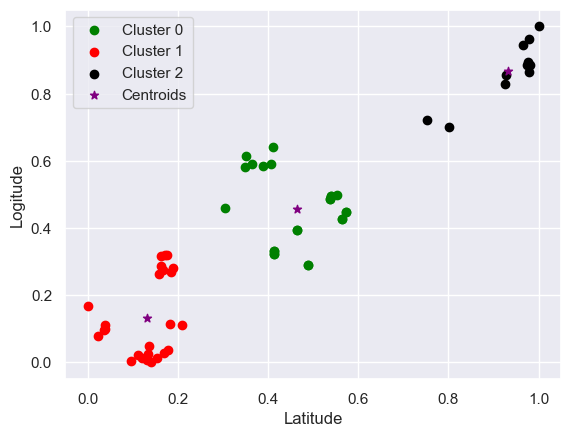

In [61]:
import matplotlib.pyplot as plt

df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1.Latitude, df1['Logitude'], color="green", label='Cluster 0')
plt.scatter(df2.Latitude, df2['Logitude'], color="red", label='Cluster 1')
plt.scatter(df3.Latitude, df3['Logitude'], color="black", label='Cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color="purple", marker="*", label='Centroids')
plt.xlabel("Latitude")
plt.ylabel("Logitude")
plt.legend()
plt.show()